# Create Local Quantum Development Environment (Windows)

## Download and install [Python 3.10.11 (64-bit)](https://www.python.org/downloads/release/python-31011/)
**Python** will be installed in *%userprofile%/AppData/Local/Programs/Python/Python310* folder.
Set up Python environment variables:
1. Open *Administrative Tools* (i.e. *Control Panel*)
2. Using *Search Control Panel* box (in top right corner) search for *environment* and press *enter*
3. Click on *Edit the system environment variables* link
4. *System Properties* box will open, click on *Environment variables...* button (at bottom-right corner)
5. *Environment variables* box will open
6. If *PYTHONHOME* already exist in *User variables for ...*, use *Edit..." button to change it, otherwise use *New...* button
7. Set *PYTHONHOME* to *%userprofile%/AppData/Local/Programs/Python/Python310*
8. If *PYTHONPATH* already exist in *User variables for ...*, use *Edit..." button to change it, otherwise use *New...* button
9. Set *PYTHONPATH* to *%PYTHONHOME%*
10. If *PATH* already exist in *User variables for ...*, use *Edit..." button to change it, otherwise use *New...* button
11. Make sure that *PATH* includes *%userprofile%\AppData\Local\Programs\Python\Python310\Scripts\* and %userprofile%\AppData\Local\Programs\Python\Python310\* paths

Now **python** is ready to set up a new virtual environment. To verify all is ready, open *Command Prompt* window and run 
> python --version

Python 3.10.11

## Create python virtual environment for quantum development
Create a virtual environment for your Quantum work. To create **d5** quantum virtual environment (**QVE**):
1. Open *Command Prompt* window
2. Go to folder where *d5* virtual environment folder should be created
    - e.g. you can create *Envs* folder in *%userprofile%/AppData/Local* folder and run the following command
    > cd %userprofile%/AppData/Local/Envs
3. Run the following command to create a virtual environment called **d5**
    > python -m venv d5
4. *Activate* the QVE by running:
    > %userprofile%/AppData/Local/Envs/d5/Scripts/activate
5. As a result, the prompt will change to begin with *(d5)*
6. Upgrade *pip* by running:
    > python -m pip install --upgrade pip
7. To be able to execute or create *jupyterlab and notebook* [install jupyter packages](https://jupyter.org/install) by running:
    > pip install --upgrade jupyterlab
    
    > pip install --upgrade notebook
    
    
    
# Install Spyder 
To be able to write or debug python code download and install [Spyder 5.5.1](https://www.spyder-ide.org/)
- Spyder comes with selected python 3.7.9 package. To use Python 3.10.11 in your *quantum virtual environment (QVE)* 
    1. Install spyder-kernels and matplotlib, using *Command Prompt* in the **active QVE**, e.g. *d5* 
    
    > pip install --upgrade matplotlib
    >
    > pip install spyder-kernels==5.5.*
        
    - **Note**: make sure spyder kernel version is correct!
        
    2. Open Spyder from *Windows Start menu*
    3. Change Spyder’s default Python interpreter by click the name of the current environment (i.e. *custom(Python 3.7.5)*) in the status bar, 
    4. then click *Change default environment in Preferences...*, which will open the *Preferences* dialog in the Python interpreter section. 
    5. select the option *Use the following Python interpreter*, 
    6. use the text box or the Select file button to enter the path to the Python interpreter in your QVE, e.g.:
        > %userprofile%/AppData/Local/Envs/d5/Scripts/python.exe 
    - The name of the current environment in the status bar should change to *custom(Python 3.10.11)*. 
    - See the [IPython Console](https://docs.spyder-ide.org/current/panes/ipythonconsole.html)  for more information.

## Quantum coding with [dann5.d5](https://pypi.org/project/dann5/) 
To write a simple quantum code that you can run on a quantum simulator, annealer or computer you should install **dann5 library d5**, version 3 for Windows.

> pip install --upgrade dann5

This will install pybind11 and dann5 packages into %userprofile%/AppData/Local/Envs/d5/Lib/site-packages.

To test your local QVE, you can run the following code using **python** from a *Command Prompt* or use **spyder** as an *IDE*.
> The following code finds all possible combinations of 3 numbers that will add to the number 10, where number **p** is *unknown q-whole number with 3 q-bits in superposition state*, while **q** and **r** are two *unknown q-whole numbers with 2 q-bits* each, and where python variable **Sum** references **S** q-whole number with deterministic value 10.
>
> **sumAssignmnet** is a python variable which references **a quantum assignment of p, q and r addition expression to the S q-whole number**.

In [1]:
import dann5.d5 as d5
from dann5.dwave import Solver
p = d5.Qwhole(3,"p")
q = d5.Qwhole(2, "q")
r = d5.Qwhole(2, "r")
Sum = d5.Qwhole("S", 10)
sumAssignment = Sum.assign(p + q + r)
print(sumAssignment)

S\4:10\ = ((p\3:U\ + q\2:U\) + r\2:U\)


>
> The *sumAssignment.solve()* method uses dann5.d5o quantum annealing simulator to identify all possible solutions for **p, q and r** (shown in code below).
>
> Before *solve()* methd is called, we need to call *Solver.Active()* to activate the default dann5 solver simulating solutions.

In [2]:
Solver.Active()
sumAssignment.solve()
print("d5o simulation solutions: \n{}".format(sumAssignment.solutions()))

d5o simulation solutions: 
S\4:10\; _+0\4:13\; p\3:6\; q\2:2\; r\2:2\
S\4:10\; _+0\4:13\; p\3:4\; q\2:3\; r\2:3\
S\4:10\; _+0\4:13\; p\3:6\; q\2:1\; r\2:3\
S\4:10\; _+0\4:13\; p\3:5\; q\2:2\; r\2:3\
S\4:10\; _+0\4:13\; p\3:5\; q\2:3\; r\2:2\
S\4:10\; _+0\4:13\; p\3:7\; q\2:0\; r\2:3\
S\4:10\; _+0\4:13\; p\3:7\; q\2:1\; r\2:2\
S\4:10\; _+0\4:15\; p\3:6\; q\2:3\; r\2:1\
S\4:10\; _+0\4:15\; p\3:7\; q\2:2\; r\2:1\
S\4:10\; _+0\4:15\; p\3:7\; q\2:3\; r\2:0\



The *sumAssignment.solutions()* method returns line by line all found solutions of expression **S = 10 = p[3 qb] + q[2 qb] + r[2 qb]**, where each variable is presented as 
> **variable_name** \\ **#_of_q-bits : varaible_value** \\, e.g. p\\3:6\\; q\\2:2\\; r\\2:2\\.

Additionally, any variable named **'_< sign >#'** (where *#* is a number) is an auxiliary variable. For example, an addition auxiliary variable is **_+0** with **4 qbits** and **value 13**.

Furthermore, we can easily prepare the assignment for execution on a quantum computer, by retrieving its QUBO presentation. To do so, we are using an instance of a **QuboCompiler**.
> The *sumAssignment* is converted into its **qubo** presentation via *sumAssignment.compile()* call, below.
>
> While, an instance of a **QuboAnalyzer** returns a number of *logical quantum nodes and branches* in the given qubo.

In [3]:
from dann5.d5o import QuboCompiler, QuboAnalyzer

compiler = QuboCompiler()

sumAssignment.compile(compiler)
qubo = compiler.qubo()

print("--- Reduced discrete values Qubo --- {}\n".format(qubo))
analyze = QuboAnalyzer(qubo)
print("# of nodes: {}\t# of branches: {}".format(analyze.nodesNo(), analyze.branchesNo()))

--- Reduced discrete values Qubo --- {('#[S0]', '#[S0]'): 5.0, ('#[S0]', '#[_+01]'): -4.0, ('#[S0]', '_+01'): -2.0, ('#[S1]', '#[S1]'): 5.0, ('#[_+01]', '#[S1]'): 2.0, ('#[_+01]', '#[_+01]'): 1.0, ('_+01', '#[S1]'): -4.0, ('_+01', '#[_+01]'): 4.0, ('_+01', '_+01'): 0.0, ('_+01', 'r1'): 2.0, ('p0', '#[S0]'): -4.0, ('p0', 'p0'): 1.0, ('p0', 'q0'): 2.0, ('p0', 'r0'): 2.0, ('p1', '#[S0]'): 2.0, ('p1', '#[_+01]'): -4.0, ('p1', '_+01'): -2.0, ('p1', 'p1'): 1.0, ('p1', 'q1'): 2.0, ('p2', '#[S1]'): 2.0, ('p2', '#[_+01]'): 2.0, ('p2', 'p2'): -3.0, ('q0', '#[S0]'): -4.0, ('q0', 'q0'): 1.0, ('q0', 'r0'): 2.0, ('q1', '#[S0]'): 2.0, ('q1', '#[_+01]'): -4.0, ('q1', '_+01'): -2.0, ('q1', 'q1'): 1.0, ('r0', '#[S0]'): -4.0, ('r0', 'r0'): 1.0, ('r1', '#[S1]'): -4.0, ('r1', 'r1'): -1.0}

# of nodes: 11	# of branches: 22


## To Use DWave Install [Ocean Tools](https://docs.ocean.dwavesys.com/en/latest/overview/install.html)
If you would like to develop a quantum solution to be executed on *DWave quantum annealer, hybrid-computer or simulator*, you have to create a developer account in *DWave Leap* cloud and install *DWave Ocean SDK* in local *QVE*.
1. To create DWave Leap developer account you need a *[github account](https://github.com/)*. If you don't, [create one](https://docs.github.com/en/get-started/signing-up-for-github/signing-up-for-a-new-github-account).
2. Create a developer account on [*DWave Leap*](https://cloud.dwavesys.com/leap/signup/).
3. [Log in](https://cloud.dwavesys.com/leap/login/?next=/leap/) using your DWave Leap account.
    - Once you sucessfully login using you D-Wave Leap account you will be presented with your Dashboard page:

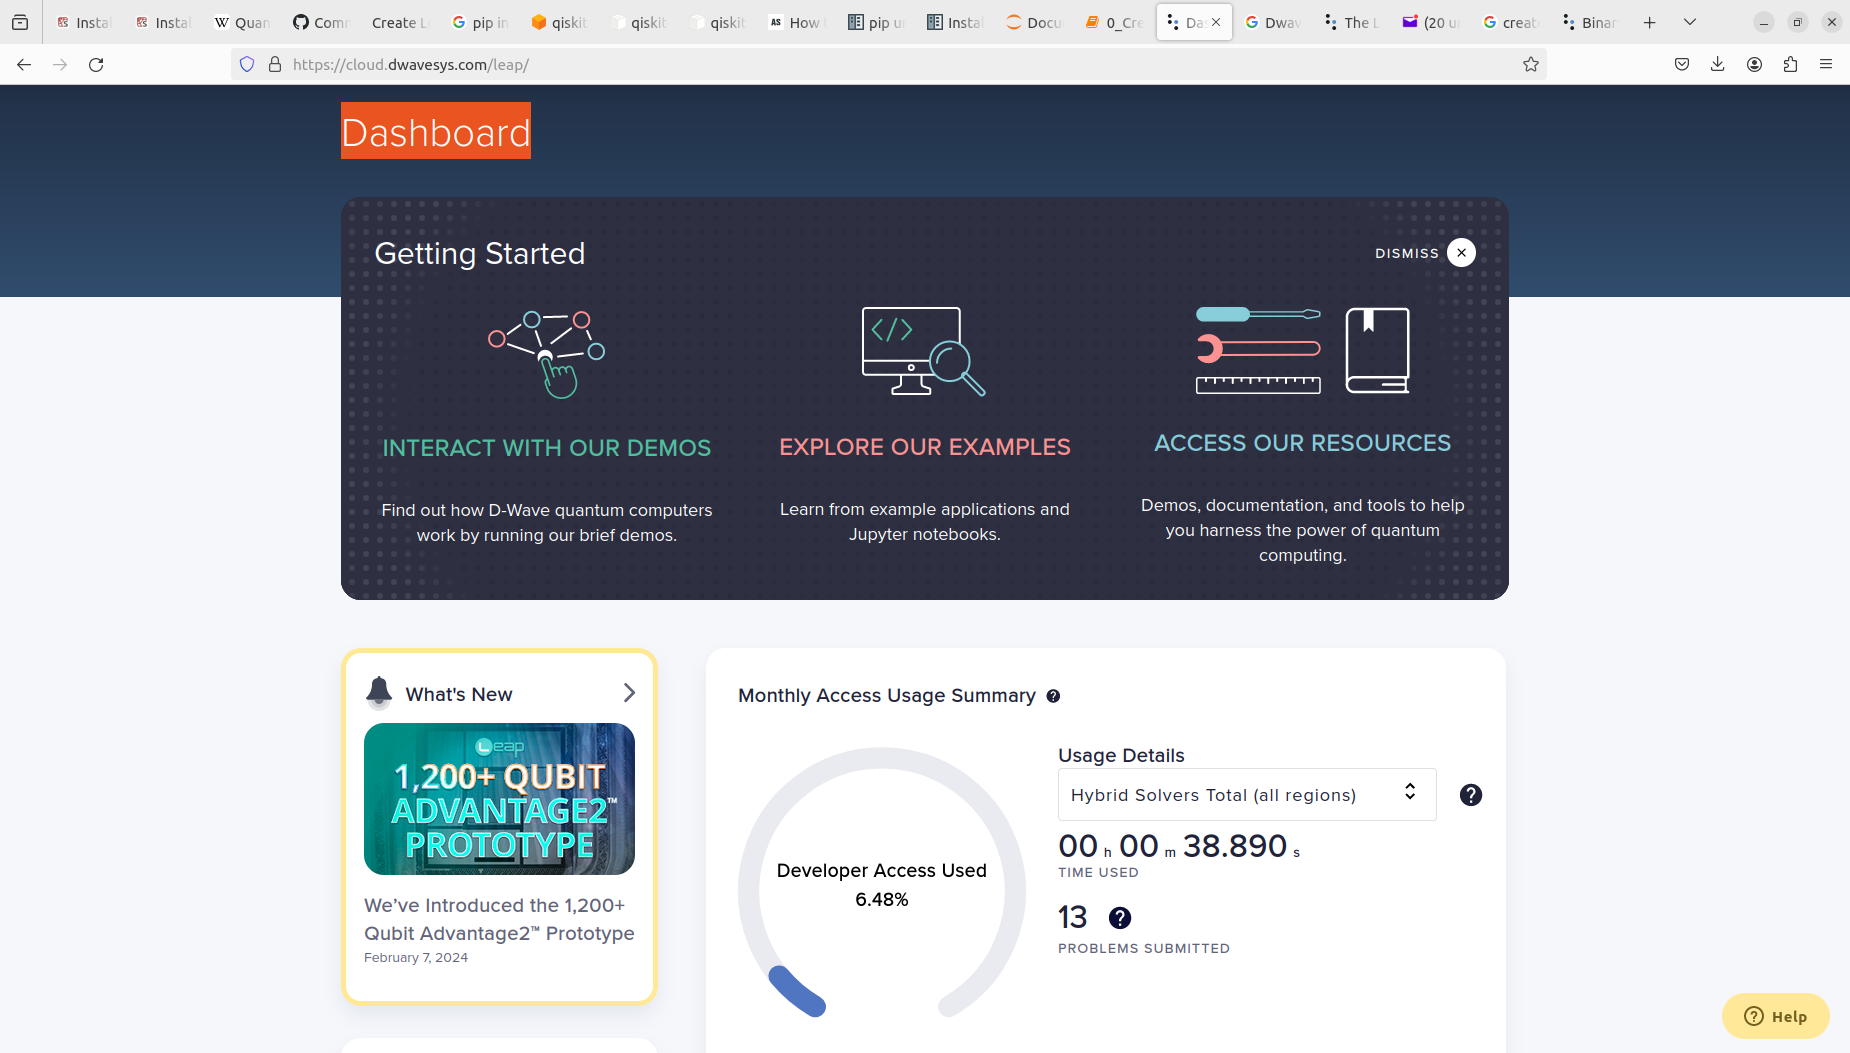

4. While loged-in you can set up you account to use '[Free Developer Access]https://cloud.dwavesys.com/leap/plans/ plan'. 
5. Explore DWave Leap landing page and locate *API Token*, which you will need to configure DWave Ocean in your local QVE.
    - You can develop/debug DWave specialized quantum solutions in Leap, by creating your *Leap IDE*, under *Resources*.
6. To use DWave Ocean SDK on your laptop [Install](https://docs.ocean.dwavesys.com/en/latest/overview/install.html)  by running following commands using *Command Prompt* in your local **active QVE**
    > pip install --upgrade dwave-ocean-sdk
7. [configure](https://docs.ocean.dwavesys.com/en/stable/docs_cli.html) DWave Ocean in your local QVE by running:
    > dwave config create
    1. when prompted *Available profiles: defaults* just press *enter* 
    2. when prompted *Profile (select existing or create new) [defaults]:* just press *enter* 
    3. when prompted to enter *Authentication token [skip]:* past the *API Token* that you have copied from your DWave Leap landing page and press *enter*
    - The result should be:
        > Using the simplified configuration flow.
        >
        > Try 'dwave config create --full' for more options.
        >
        >
        > Updating existing configuration file: %userprofile%\AppData\Local\dwavesystem\dwave\dwave.conf
        >
        > **Available profiles: defaults**
        >
        > **Profile (select existing or create new) [defaults]:**
        >
        > Updating existing profile: defaults
        >
        > **Authentication token [skip]:** DEV-#########################
        >
        > Configuration saved.

6. [Test communications](https://docs.ocean.dwavesys.com/en/latest/overview/sapi.html) with the DWave quantum computer by running:
    > dwave ping --client qpu
    - If you encounter SSLError, you need to download and past certificates recognised by DWave endpoint into *cacert.pem* file located in *Lib\site-packages\certifi\* in your local *QVE* by following these [instructions](https://support.dwavesys.com/hc/en-us/community/posts/360018930954-Resolving-SSL-certificate-verify-fails-error-message-from-dwave-ping-command). Step-by-step instructions for Windows are one third down the page. Serach for *Windows specific instructions* to locate them.

Now your local *QVE* is ready for development of quantum solutions, which you can confirm by submitting a random problem to a remote solver by running follwoing command using *Command Prompt* in **active QVE**.
> dwave sample --random-problem

Also, you can use installed *python* and *spyder* IDEs to develop python code and test it on [DWave simulators](https://docs.ocean.dwavesys.com/en/latest/docs_dimod/reference/sampler_composites/samplers.html), [quantum solvers](https://docs.ocean.dwavesys.com/en/stable/overview/qpu.html#using-qpu) or [hybrid  sampler](https://docs.ocean.dwavesys.com/en/stable/overview/samplers.html).


# Testing assignment qubo on DWave hybrid sampler
The created qubo in previous chapter can be executed on DWave Hybrid computer as in the following example:
> The *qubo* is sent to **LeapHybridSampler** via *hybrid.solution(...)* call, which returns a evaluations.
>
> *sumAssignment.reset()* sets the quantum assignment into its initial stage, i.e. without previously calculated solutions.
>
> The retrieved *evaluations* are added to the original assignment *sumAssignment*, in order for the assignment to interpret them as its valid solutions.
- **NOTE**: Hybrid sampler always returns just one of the possible QUBO function minimums, i.e. solutions...

In [4]:
from dann5.dwave import QuboSolvers

hybrid = QuboSolvers.solver("Hybrid")
evaluations = hybrid.solution(qubo)

sumAssignment.reset()
sumAssignment.add(evaluations)
print("DWave Hybrid-sampler QUBO solutions: \n{}".format(sumAssignment.solutions()))

CONNECTED to hybrid_binary_quadratic_model_version2.
DWave Hybrid-sampler QUBO solutions: 
S\4:10\; _+0\4:13\; p\3:4\; q\2:3\; r\2:3\



- **NOTE**: ... however, the hybrid sampler doesn't always return the same minimum.
> In The following example the *qubo* is converted into DWave's BQM presentation of *sumAssignment* and *hybrid.sample(...)* call is used to send the *bqm* to hybrid-sampler and to receive a sampleset, which is a solution of the assignment.
- **Note**: This example explains how dwave visualizes the qubo in their systems as a [binary-quadratic-model](https://docs.ocean.dwavesys.com/en/stable/concepts/bqm.html) (BQM). It will be discussed further in chapter 5 as an advanced features.

In [5]:
import dimod
bqm = dimod.BQM.from_qubo(qubo)
from dwave.system.samplers import LeapHybridSampler
hybrid = LeapHybridSampler()
sampleset = hybrid.sample(bqm)
samples = [dict(sample) for sample in sampleset.lowest().samples()]

#mM.reset(); mM.add(samples)
print("DWave Hybrid-sampler BQM solutions: \n{}".format(samples))

DWave Hybrid-sampler BQM solutions: 
[{'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 1, 'p1': 0, 'p2': 1, 'q0': 0, 'q1': 1, 'r0': 1, 'r1': 1}]


Also, the same problem can be solved using **Dwave Advantage quantum annealer** as it is presented in the following example.
> Important to notice that the quantum annealer will require additional operational arguments specified in [**kwargs**](https://docs.dwavesys.com/docs/latest/c_solver_parameters.html).
- **Note**: This example demonstraits setting up different DWave sampler topology types. It will be discussed further in chapter 5 as an advanced features.

In [6]:
from dwave.system import DWaveSampler, EmbeddingComposite
qpu_advantage = DWaveSampler(solver={'topology__type': 'pegasus', 'qpu': True})
kwargs = {'num_reads': 1000,
            'answer_mode': 'histogram',
            'chain_strength': 2  
        }
advantage = EmbeddingComposite(qpu_advantage)
sampleset = advantage.sample_qubo(qubo, **kwargs)
samples = [dict(sample) for sample in sampleset.lowest().samples()]
print("DWave Advantage solutions: \n{}".format(samples))

DWave Advantage solutions: 
[{'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 1, 'p1': 1, 'p2': 1, 'q0': 0, 'q1': 0, 'r0': 1, 'r1': 1}, {'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 1, 'p1': 1, 'p2': 1, 'q0': 1, 'q1': 0, 'r0': 0, 'r1': 1}, {'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 0, 'p1': 1, 'p2': 1, 'q0': 1, 'q1': 0, 'r0': 1, 'r1': 1}, {'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 1, 'p1': 0, 'p2': 1, 'q0': 0, 'q1': 1, 'r0': 1, 'r1': 1}, {'#[S0]': 0, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 0, 'p1': 1, 'p2': 1, 'q0': 0, 'q1': 1, 'r0': 0, 'r1': 1}, {'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 0, 'p1': 0, 'p2': 1, 'q0': 1, 'q1': 1, 'r0': 1, 'r1': 1}, {'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 0, 'p0': 1, 'p1': 0, 'p2': 1, 'q0': 1, 'q1': 1, 'r0': 0, 'r1': 1}, {'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 1, 'p0': 1, 'p1': 1, 'p2': 1, 'q0': 0, 'q1': 1, 'r0': 1, 'r1': 0}, {'#[S0]': 1, '#[S1]': 0, '#[_+01]': 1, '_+01': 1, 'p0': 0, 

## Add [IBM Qiskit](https://qiskit.org/documentation/getting_started.html) to local quantum virtual environment 
To be able to use IBM's analog quantum gates computer you will need to create IBM Quantum cloud account, install Qiskit python package and set up your API key. 
1. You can sign in to [IBM Quantum](https://quantum-computing.ibm.com/) using your github account
2. Run the following command in your local quantum virtual environment (QVE) to install qiskit package

    > pip install qiskit==0.44.3
    >
    > pip install qiskit-aer==0.13.0
    >
    > pip install qiskit-ibm-provider==0.7.0
    
3. After installation check the version of installed 'qiskit-terra' package is 0.25.3 by running:

    > pip list
    
3. [Instal your IBM Quantum API key](https://subscription.packtpub.com/book/programming/9781838828448/1/ch01lvl1sec06/installing-your-api-key-and-accessing-your-provider)
    1. Copy API token from you IBM Quantum dashboard
    2. From *Command Prompt* with active QVE (e.g. d5) run 
        > python
    3. In python run
        > \>>> from qiskit_ibm_provider import IBMProvider
        >
        > \>>> IBMProvider.save_account('#########')
        >
        > \>>> exit()
        
        - NOTE: in the code above replace *#########* with the **API token** that you have copied

Once all is done, you can run the follwing code to execute addition assignment **aA** on IBM's qiskit simulator.

In [13]:
x = d5.Qwhole(2, "x"); y = d5.Qwhole(2, "y"); z = d5.Qwhole(2, "z")

timesAssign = d5.Qblock() << (y == x) << z._(x * y)
print("\n{} \n\n {}\n\n".format(timesAssign, timesAssign.toString(True)))


{
	(y\2:U\ == x\2:U\);
	z\4:U\ = (x\2:U\ * y\2:U\);
} 

  y0\S\ == x0\S\; y1\S\ == x1\S\; ; z0\S\ = x0\S\ & y0\S\; z1\S\ = _&14\S\ .+ _&13\S\; _&14\S\ = x1\S\ & y0\S\; _&13\S\ = x0\S\ & y1\S\; z2\S\ = _&15\S\ .+ #[z1]\S\; _&15\S\ = x1\S\ & y1\S\; z3\S\ = #[z2]\S\; 




In [14]:
from dann5.d5q import CircuitCompiler
compiler = CircuitCompiler()
timesAssign.compile(compiler)
circuit = compiler.circuit()
print(circuit.draw())

     #[z1]: ----------------------------X--------+--+- 0 
      _&13: -------------------X-----+--+------------- 1 
      _&14: ----------------X-----+-----+------------- 2 
      _&15: -------------------------------X--+-----+- 3 
        x0: -h-----+-----+-----+---------------------- 4 
        x1: ----h-----+-----+--------------+---------- 5 
        y0: -------X-----+--+------------------------- 6 
        y1: ----------X--------+-----------+---------- 7 
        z0: -------------X---------------------------- 8 
        z1: ----------------------X--X---------------- 9 
        z2: ----------------------------------X--X---- 10 
        z3: ----------------------------------------X- 11 



In [16]:
print("Active Dann5 simulator solutions: \n{}\n".format(
                                                    timesAssign.solve()))  

Active Dann5 simulator solutions: 
 y\2:0\; x\2:0\ z\4:0\; x\2:0\; y\2:0\
 y\2:1\; x\2:1\ z\4:1\; x\2:1\; y\2:1\
 y\2:2\; x\2:2\ z\4:4\; x\2:2\; y\2:2\
 y\2:3\; x\2:3\ z\4:9\; x\2:3\; y\2:3\




In [17]:
from dann5.qiskit import Solver as QiskitSolver      
QiskitSolver.Active()

qiskitCircuit = QiskitSolver.Active().qiskitCircuit(circuit)

print(qiskitCircuit.draw())   

                                                          ┌───┐              »
#[z1]: ───────────────────────────────────────────────────┤ X ├───────────■──»
                                ┌───┐                     └─┬─┘           │  »
 _&13: ─────────────────────────┤ X ├──────────────────■────■─────────────┼──»
                           ┌───┐└─┬─┘                  │    │             │  »
 _&14: ────────────────────┤ X ├──┼────■───────────────┼────■─────────────┼──»
                           └─┬─┘  │    │  ┌───┐        │                  │  »
 _&15: ──────────────────────┼────┼────┼──┤ X ├────────┼────■─────────────┼──»
       ┌───┐                 │    │    │  └─┬─┘┌─┐     │    │             │  »
   x0: ┤ H ├──■─────────■────┼────■────┼────┼──┤M├─────┼────┼─────────────┼──»
       ├───┤  │         │    │    │    │    │  └╥┘     │    │  ┌─┐        │  »
   x1: ┤ H ├──┼────■────┼────■────┼────┼────■───╫──────┼────┼──┤M├────────┼──»
       └───┘┌─┴─┐  │    │    │    │    │    │   ║ ┌─

In [19]:
print("Active Qiskit Aer simulator solutions: \n{}\n".format(
                                                    timesAssign.solve()))   

Active Qiskit Aer simulator solutions: 
 y\2:1\; x\2:1\ z\4:1\; x\2:1\; y\2:1\
 y\2:2\; x\2:2\ z\4:4\; x\2:2\; y\2:2\
 y\2:3\; x\2:3\ z\4:9\; x\2:3\; y\2:3\
 y\2:0\; x\2:0\ z\4:0\; x\2:0\; y\2:0\


